# Question 1

In [1]:
import pandas as pd
df=pd.read_csv('nba_2013.csv')
df.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [4]:
df.shape

(481, 31)

In [2]:
df.isna().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [5]:
df["fg."].fillna(df["fg."].mean(),inplace=True)
df["x2p."].fillna(df["x2p."].mean(),inplace=True)
df["efg."].fillna(df["efg."].mean(),inplace=True)
df["x3p."].fillna(df["x3p."].mean(),inplace=True)
df["ft."].fillna(df["ft."].mean(),inplace=True)

In [6]:
numeric_columns = ['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']
nba_numeric = df[numeric_columns]

In [7]:
nba_normalized = nba_numeric.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [8]:
nba_category = df[['player', 'bref_team_id', 'season']]
df = pd.concat([nba_category, nba_normalized], axis=1)

from sklearn.model_selection import train_test_split
x_columns = df[['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf']]
y_column = df["pts"]
x_train, x_test, y_train, y_test = train_test_split(x_columns, y_column, test_size=0.3, random_state=0)

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

for k in range(10):
    k_value = k + 1
    knn = KNeighborsRegressor(n_neighbors = k_value)
    knn.fit(x_train, y_train) 
    y_pred = knn.predict(x_test)
    print ("Regression score is:",format(metrics.r2_score(y_test, y_pred),'.4f'), "for k_value:", k_value)

Regression score is: 0.9145 for k_value: 1
Regression score is: 0.9464 for k_value: 2
Regression score is: 0.9548 for k_value: 3
Regression score is: 0.9594 for k_value: 4
Regression score is: 0.9583 for k_value: 5
Regression score is: 0.9579 for k_value: 6
Regression score is: 0.9579 for k_value: 7
Regression score is: 0.9609 for k_value: 8
Regression score is: 0.9576 for k_value: 9
Regression score is: 0.9557 for k_value: 10


In [10]:
knn = KNeighborsRegressor(n_neighbors = 8)
knn.fit(x_train, y_train) 
y_pred = knn.predict(x_test)
print ("Mean Squared Error is:", format(metrics.mean_squared_error(y_test, y_pred), '.7f'))
print ("Regression score is:", format(metrics.r2_score(y_test, y_pred),'.4f'))

Mean Squared Error is: 0.0011143
Regression score is: 0.9609


# Question 2

In [11]:
from bs4 import BeautifulSoup
import urllib.request
import nltk

response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")

In [16]:
text = soup.get_text(strip=True) 
tokens = [t for t in text.split()] 
clean_tokens = tokens[:] 
sr = nltk.corpus.stopwords.words('english') 
for token in tokens: 
    if token in nltk.corpus.stopwords.words('english'): 
        clean_tokens.remove(token) 
freq = nltk.FreqDist(clean_tokens) 
for key,val in freq.items(): 
    print (str(key) + '->' + str(val))

PHP:->1
Hypertext->1
PreprocessorDownloadsDocumentationGet->1
InvolvedHelpGetting->1
StartedIntroductionA->1
simple->1
tutorialLanguage->1
ReferenceBasic->1
syntaxTypesVariablesConstantsExpressionsOperatorsControl->1
StructuresFunctionsClasses->1
ObjectsNamespacesErrorsExceptionsGeneratorsAttributesReferences->1
ExplainedPredefined->1
VariablesPredefined->1
ExceptionsPredefined->1
Interfaces->1
ClassesContext->1
options->1
parametersSupported->1
Protocols->1
WrappersSecurityIntroductionGeneral->1
considerationsInstalled->1
CGI->1
binaryInstalled->1
Apache->1
moduleSession->1
SecurityFilesystem->1
SecurityDatabase->1
SecurityError->1
ReportingUser->1
Submitted->1
DataHiding->1
PHPKeeping->1
CurrentFeaturesHTTP->1
authentication->1
PHPCookiesSessionsDealing->1
XFormsHandling->1
file->1
uploadsUsing->1
remote->1
filesConnection->1
handlingPersistent->1
Database->1
ConnectionsCommand->1
line->1
usageGarbage->1
CollectionDTrace->1
Dynamic->1
TracingFunction->1
ReferenceAffecting->1
PHP's->1

# Question 3

### Done in ML CLUSTERING project

# Question 4

### Done in Visualisation Assignment 1

# Question 5

### Dataset Not available re-directing to this page

# 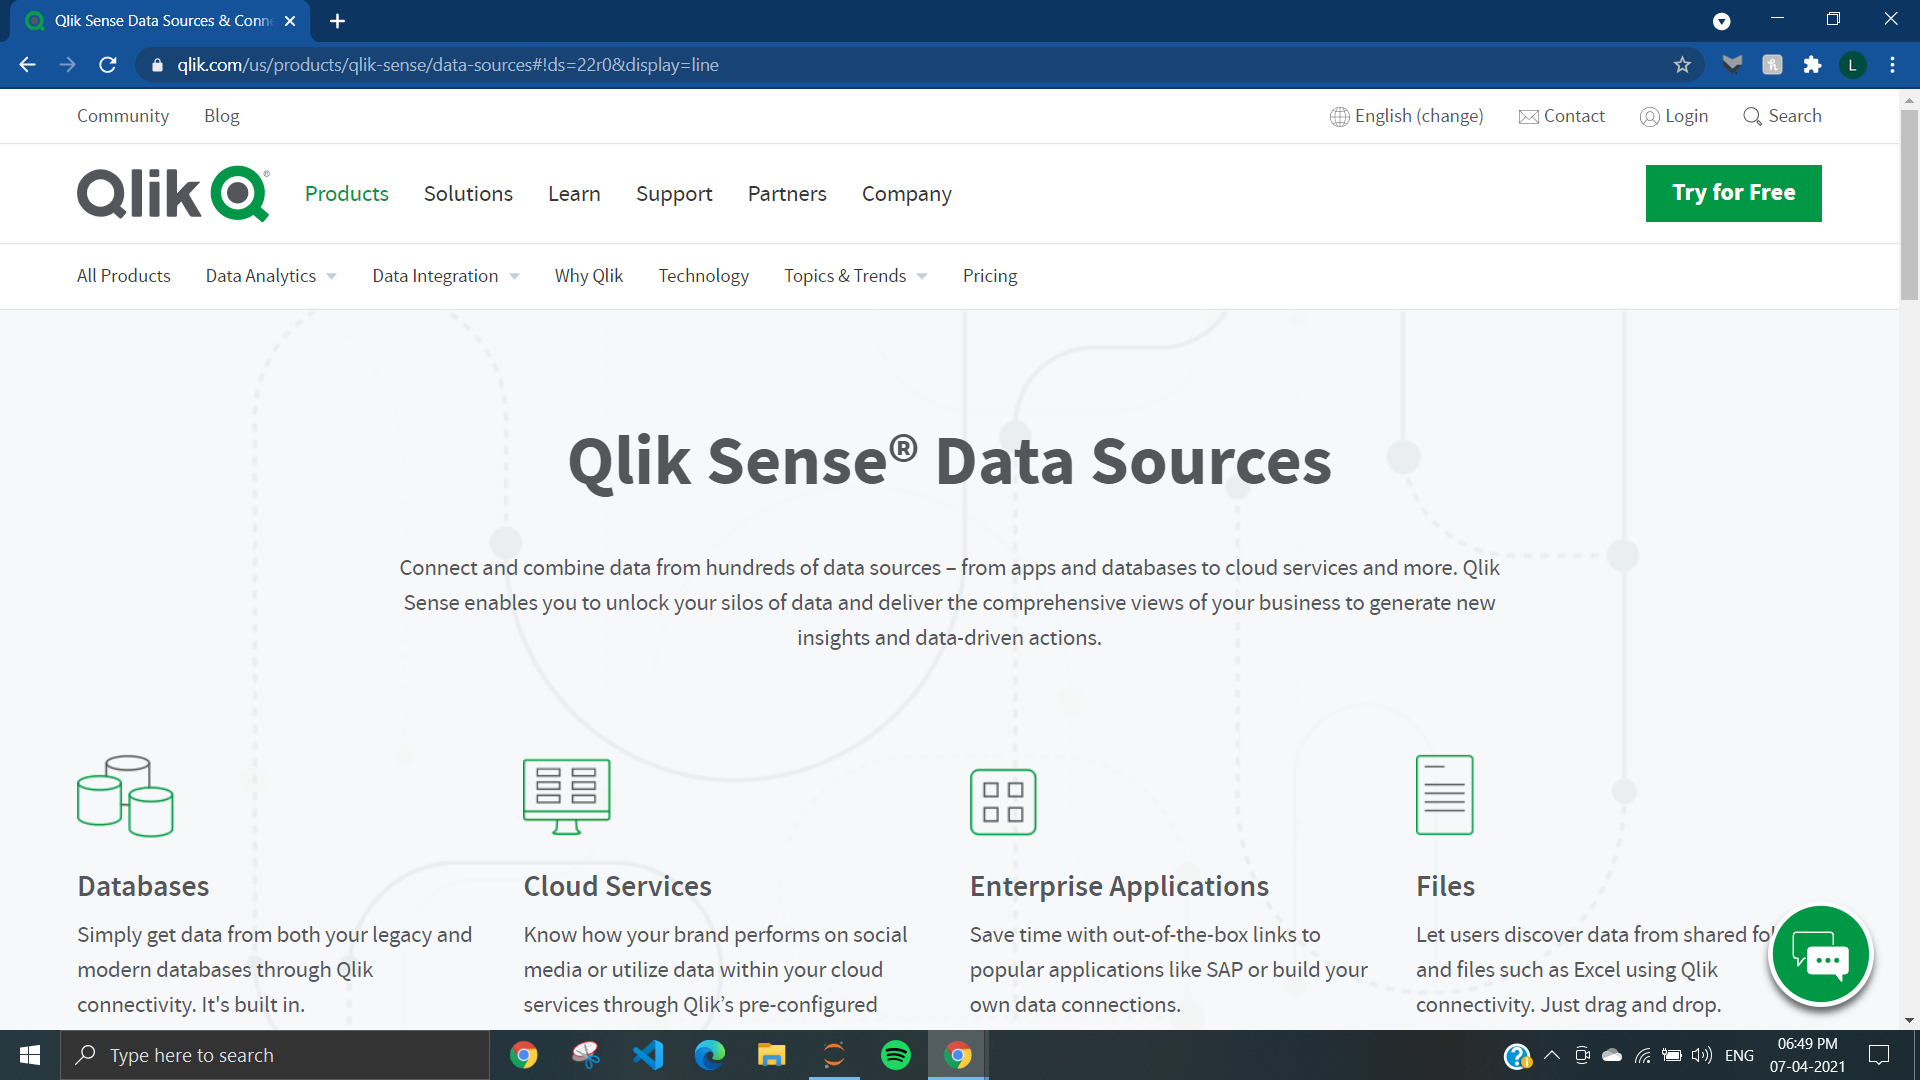